# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

response_json=[]
skipped_cities = []

print("Beginning Data Retrieval")
print("-----------------------------")
for x in range(len(cities)):
    query_url = base_url + "appid=" + api_key + "&units=imperial" + "&q=" + cities[x]
    response = requests.get(query_url).json()
    if response['cod'] == "404":
        print(f"City not found. Skipping...")
        skipped_cities.append(cities[x])
    else:
        print(f"Processing Record {x}| {cities[x]}")
        response_json.append(response)

print("-----------------------------")
print(f"Data Retrieval Complete ({len(response_json)} retrieved, {len(skipped_cities)} skipped)")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set ??? | dikson
Processing Record 1 of Set ??? | thompson
Processing Record 2 of Set ??? | cap malheureux
Processing Record 3 of Set ??? | bredasdorp
Processing Record 4 of Set ??? | shiyan
Processing Record 5 of Set ??? | yellowknife
Processing Record 6 of Set ??? | tucumcari
Processing Record 7 of Set ??? | komsomolskiy
Processing Record 8 of Set ??? | portobelo
Processing Record 9 of Set ??? | namibe
Processing Record 10 of Set ??? | ushuaia
Processing Record 11 of Set ??? | busselton
Processing Record 12 of Set ??? | norman wells
Processing Record 13 of Set ??? | avarua
City not found. Skipping...
Processing Record 15 of Set ??? | genhe
Processing Record 16 of Set ??? | mapiri
Processing Record 17 of Set ??? | lorengau
Processing Record 18 of Set ??? | hermanus
Processing Record 19 of Set ??? | punta arenas
Processing Record 20 of Set ??? | praia da vitoria
Processing Record 21 of Set ??? | san patricio


Processing Record 193 of Set ??? | tiksi
Processing Record 194 of Set ??? | klyuchi
Processing Record 195 of Set ??? | antalaha
Processing Record 196 of Set ??? | cabo san lucas
Processing Record 197 of Set ??? | baruun-urt
Processing Record 198 of Set ??? | port-gentil
Processing Record 199 of Set ??? | keokuk
City not found. Skipping...
Processing Record 201 of Set ??? | newport
Processing Record 202 of Set ??? | aklavik
Processing Record 203 of Set ??? | caravelas
Processing Record 204 of Set ??? | ekhabi
Processing Record 205 of Set ??? | lasa
Processing Record 206 of Set ??? | san jose
Processing Record 207 of Set ??? | hue
Processing Record 208 of Set ??? | prince rupert
Processing Record 209 of Set ??? | mocuba
Processing Record 210 of Set ??? | wodonga
Processing Record 211 of Set ??? | cherskiy
Processing Record 212 of Set ??? | port elizabeth
Processing Record 213 of Set ??? | petropavlovsk-kamchatskiy
Processing Record 214 of Set ??? | hagere hiywet
Processing Record 215 of 

Processing Record 385 of Set ??? | ayan
Processing Record 386 of Set ??? | kahului
Processing Record 387 of Set ??? | bichena
Processing Record 388 of Set ??? | damietta
Processing Record 389 of Set ??? | issia
Processing Record 390 of Set ??? | zhanakorgan
Processing Record 391 of Set ??? | sunyani
Processing Record 392 of Set ??? | hami
City not found. Skipping...
City not found. Skipping...
Processing Record 395 of Set ??? | cusuna
City not found. Skipping...
Processing Record 397 of Set ??? | camocim
Processing Record 398 of Set ??? | qabaqcol
Processing Record 399 of Set ??? | saint-louis
Processing Record 400 of Set ??? | grindavik
Processing Record 401 of Set ??? | tocopilla
Processing Record 402 of Set ??? | takhtamygda
Processing Record 403 of Set ??? | kasongo
Processing Record 404 of Set ??? | karpathos
Processing Record 405 of Set ??? | rhyl
Processing Record 406 of Set ??? | zainsk
Processing Record 407 of Set ??? | arlit
Processing Record 408 of Set ??? | cayenne
Processi

Processing Record 575 of Set ??? | fuerte olimpo
Processing Record 576 of Set ??? | srednekolymsk
Processing Record 577 of Set ??? | tamandare
Processing Record 578 of Set ??? | viet tri
Processing Record 579 of Set ??? | shitanjing
Processing Record 580 of Set ??? | xingyi
Processing Record 581 of Set ??? | urubicha
Processing Record 582 of Set ??? | christchurch
City not found. Skipping...
Processing Record 584 of Set ??? | binga
Processing Record 585 of Set ??? | bolobo
Processing Record 586 of Set ??? | normandin
Processing Record 587 of Set ??? | cabedelo
Processing Record 588 of Set ??? | gamboma
City not found. Skipping...
Processing Record 590 of Set ??? | tazmalt
Processing Record 591 of Set ??? | verkhoyansk
Processing Record 592 of Set ??? | bandarbeyla
Processing Record 593 of Set ??? | lohardaga
Processing Record 594 of Set ??? | banda aceh
Processing Record 595 of Set ??? | paramonga
Processing Record 596 of Set ??? | bouca
Processing Record 597 of Set ??? | san isidro
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
test = response_json[0:25]
for x in response_json:
    city.append(x['name'])
    cloudiness.append(x['clouds']['all'])
    country.append(x['sys']['country'])
    date.append(x['dt'])
    humidity.append(x['main']['humidity'])
    lat.append(x['coord']['lat'])
    lng.append(x['coord']['lon'])
    max_temp.append(x['main']['temp_max'])
    wind_speed.append(x['wind']['speed'])
city_data = ({
    "City" : city,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})

df_city_data = pd.DataFrame(city_data)
df_city_data.count()


City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [6]:
df_city_data.to_csv('city_weather_data')
df_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,88,RU,1544315527,99,73.51,80.55,14.93,29.46
1,Thompson,90,CA,1544313600,85,55.74,-97.86,12.20,6.93
2,Cap Malheureux,40,MU,1544313600,88,-19.98,57.61,77.00,10.29
3,Bredasdorp,80,ZA,1544313600,77,-34.53,20.04,59.00,3.36
4,Shiyan,32,CN,1544315355,86,32.65,110.78,20.69,2.62


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

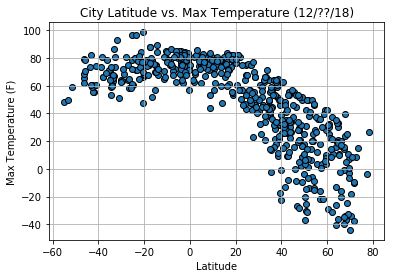

In [7]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Max Temp"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs. Max Temperature (12/??/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatVsTemp.png")
plt.show()


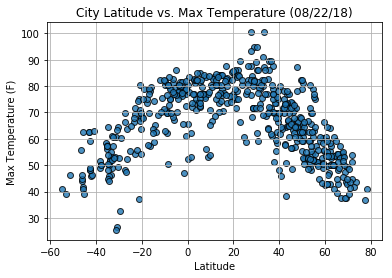

#### Latitude vs. Humidity Plot

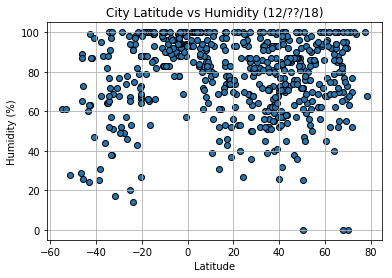

In [8]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Humidity"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs Humidity (12/??/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatVsHumidity.png")
plt.show()


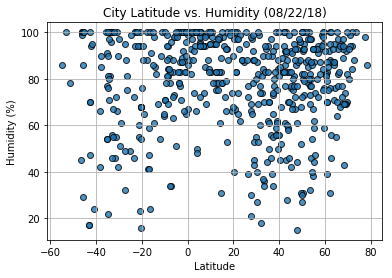

#### Latitude vs. Cloudiness Plot

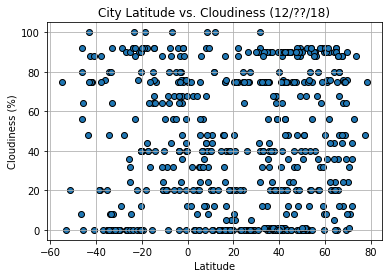

In [9]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Cloudiness"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs. Cloudiness (12/??/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatVsCloud.png")
plt.show()

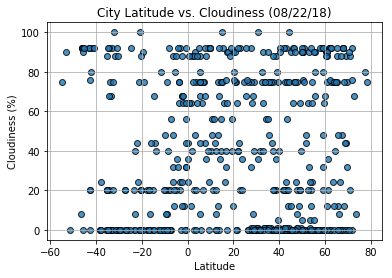

#### Latitude vs. Wind Speed Plot

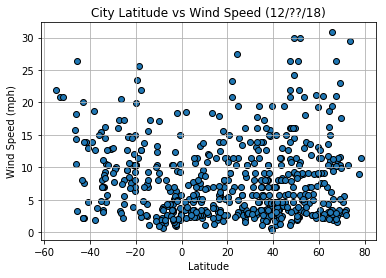

In [10]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Wind Speed"], edgecolors='black')
plt.grid()
plt.title("City Latitude vs Wind Speed (12/??/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatVsWind.png")
plt.show()

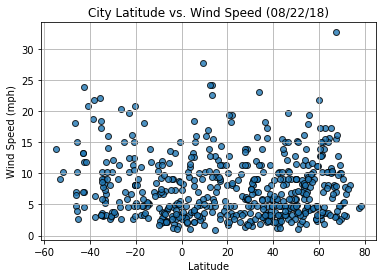

Observable Trends:

1. Cities at the equator and close to the equator have the highest max temperature. As cities get further and further away form the equator the max temperature drops. The max temperature drops much greater as you go north of the equator compared to going south of the equator. This makes sense because it is currently winter in the norther hemisphere while it is summer in the southern hemisphere.

2. 